Functions and upper bounds

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(seed=42)
n = 1000
d = 0.01

p = np.arange(0, 1.01, 0.01)

# Function to compute Hoeffding bound
def hoeffding_bound(pn_hat, n, d):
    epsilon = np.sqrt((np.log(1/d))/(2*n))
    map_epsilon = lambda x: x + epsilon
    return map_epsilon(pn_hat)

# Compute Hoeffding bound and pn_hat
pn_hat_values = [hoeffding_bound(pn, n, d) for pn in p]
pn_hat_array = np.array(pn_hat_values)
pn_hat_array = np.clip(pn_hat_array, None, 1)

# Function to compute kl-1+(pn_hat, z) using binary search
def kl_upper_inverse(pn_hat, z, delta=1e-6):
    # Define the kl function
    def kl_function(p):
        if p == 0 or pn_hat == 0 or p == 1 or pn_hat == 1:
            return 0
        return pn_hat * np.log(pn_hat / p) + (1 - pn_hat) * np.log((1 - pn_hat) / (1 - p))

    # Binary search for the inverse
    left, right = pn_hat, 1.0
    
    # Handle the case when pn_hat is close to zero
    if pn_hat < delta:
        return 0
    
    while right - left > delta:
        mid = (left + right) / 2
        if kl_function(mid) < z:
            left = mid
        else:
            right = mid

    return left

# Compute kl inequality bound
kl_bound = np.array([kl_upper_inverse(pn, np.log((n + 1) / d) / n) for pn in p])
kl_bound = np.clip(kl_bound, None, 1)

# Pinsker's relaxation
pinsker_relaxation = pn_hat_array + np.sqrt((np.log((n + 1) / d)) / (2 * n))
pinsker_relaxation = np.clip(pinsker_relaxation, None, 1)

# Refined Pinsker's relaxation
refined_pinsker_relaxation = pn_hat_array + np.sqrt((2 * pn_hat_array * np.log((n + 1) / d)) / n) + ((2 * np.log((n + 1) / d)) / n)
refined_pinsker_relaxation = np.clip(refined_pinsker_relaxation, None, 1)

Plots for functions and upper bounds

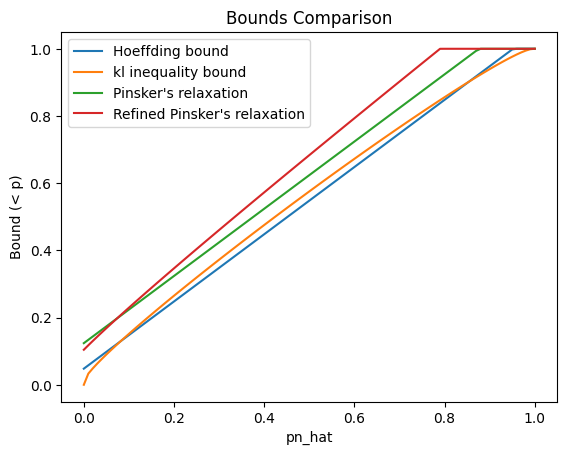

In [2]:
# Plot the functions and upper bounds
plt.plot(p, pn_hat_array, label="Hoeffding bound")
plt.plot(p, kl_bound, label="kl inequality bound")
plt.plot(p, pinsker_relaxation, label="Pinsker's relaxation")
plt.plot(p, refined_pinsker_relaxation, label="Refined Pinsker's relaxation")

plt.title("Bounds Comparison")
plt.xlabel("pn_hat")
plt.ylabel("Bound (< p)")
plt.legend()
plt.show()

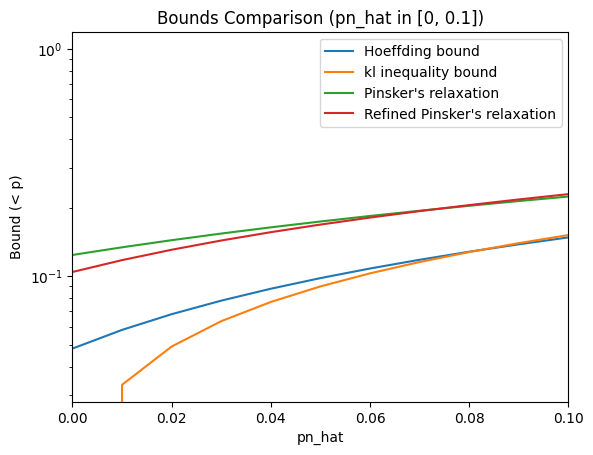

In [3]:
# Zoom in plot for pn_hat in [0, 0.1]
plt.yscale("log") # Use log scale for y-axis for better visualization
plt.plot(p, pn_hat_array, label="Hoeffding bound")
plt.plot(p, kl_bound, label="kl inequality bound")
plt.plot(p, pinsker_relaxation, label="Pinsker's relaxation")
plt.plot(p, refined_pinsker_relaxation, label="Refined Pinsker's relaxation")

plt.title("Bounds Comparison (pn_hat in [0, 0.1])")
plt.xlabel("pn_hat")
plt.ylabel("Bound (< p)")
plt.xlim(0, 0.1)

plt.legend()
plt.show()

Functions and lower bounds

In [4]:
# Hoeffding's lower bound
def hoeffding_lower_bound(pn_hat, n, d):
    epsilon = np.sqrt((np.log(1/d))/(2*n))
    map_epsilon = lambda x: x - epsilon
    return map_epsilon(pn_hat)

# Function to compute kl-1-(pn_hat, z) using binary search
def kl_lower_inverse(pn_hat, z, delta=1e-6):
    # Define the kl function
    def kl_function(p):
        if p == 0 or pn_hat == 0 or p == 1 or pn_hat == 1:
            return 0
        return pn_hat * np.log(pn_hat / p) + (1 - pn_hat) * np.log((1 - pn_hat) / (1 - p))
    
    # Binary search for the inverse
    left, right = 0.0, pn_hat

    # Handle the case when pn_hat is close to zero or one
    if pn_hat < delta:
        return 0
    if pn_hat > 1 - delta:
        return 1

    while right - left > delta:
        mid = (left + right) / 2
        if kl_function(mid) > z:
            left = mid
        else:
            right = mid

    return left

# Compute Hoeffding's lower bound and pn_hat
pn_hat_values_lower = [hoeffding_lower_bound(pn, n, d) for pn in p]
pn_hat_array_lower = np.array(pn_hat_values_lower)
pn_hat_array_lower = np.clip(pn_hat_array_lower, None, 1)

# Compute kl inequality lower bound using binary search
kl_lower_bound = np.array([kl_lower_inverse(pn, np.log((n + 1) / d) / n) for pn in p])
kl_lower_bound = np.clip(kl_lower_bound, None, 1)


Plots for functions and lower bounds

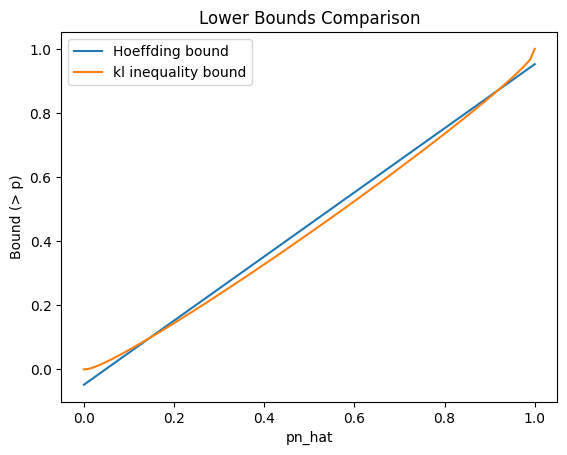

In [5]:
# Plot the functions and lower bounds
plt.plot(p, pn_hat_array_lower, label="Hoeffding bound")
plt.plot(p, kl_lower_bound, label="kl inequality bound")
plt.title("Lower Bounds Comparison")
plt.xlabel("pn_hat")
plt.ylabel("Bound (> p)")
plt.legend()
plt.show()